In [ ]:
!pip uninstall keras_vggface # for colab users
# install keras_vgg_face model: # https://github.com/rcmalli/keras-vggface
!pip install git+https://github.com/M-Taghizadeh/keras-vggface.git 
!pip install keras_applications

In [ ]:
!mkdir images

In [ ]:
!wget https://raw.githubusercontent.com/M-Taghizadeh/Deep-Face-Recognition/master/imgs/andrew_ng1.jpg -P images
!wget https://raw.githubusercontent.com/M-Taghizadeh/Deep-Face-Recognition/master/imgs/yann_lecun1.jpg -P images
!wget https://raw.githubusercontent.com/M-Taghizadeh/Deep-Face-Recognition/master/imgs/yann_lecun3.jpg -P images

In [4]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [5]:
model = VGGFace() # default : VGG16 , you can use model='resnet50' or 'senet50'

580083712/580070376 [==============================] - 49s 0us/step


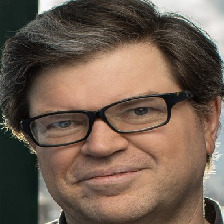

In [17]:
# Change the image path with yours.
img = image.load_img('./images/yann_lecun1.jpg', target_size=(224, 224))
img

In [18]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1) # or version=2
preds = model.predict(x)
print('Predicted:', utils.decode_predictions(preds))

Predicted: [[["b'Patton_Oswalt'", 0.069641516], ["b'Agyness_Deyn'", 0.066833474], ["b'Dianne_Wiest'", 0.04142721], ["b'Matt_Berry'", 0.014919769], ["b'Nick_Thune'", 0.012943626]]]


In [19]:
# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

58925056/58909280 [==============================] - 12s 0us/step


In [20]:
emb = vgg_features.predict(x)
emb.shape

(1, 512)

### load images from disk

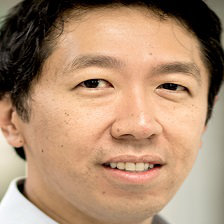

In [36]:
#read images
img1 = image.load_img('./images/andrew_ng1.jpg', target_size=(224, 224))
img1

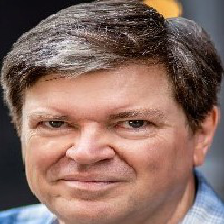

In [24]:
img2 = image.load_img('./images/yann_lecun3.jpg', target_size=(224, 224))
img2

In [26]:
def get_embedding(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1) # or version=2
    emb = vgg_features.predict(x)
    return emb

In [39]:
emb1 = get_embedding(img1)
emb2 = get_embedding(img2)

In [28]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [42]:
verification_threshhold = 100

In [43]:
dist = findEuclideanDistance(emb, emb1)
is_same = dist < verification_threshhold
print ("distance img and img1 =", dist, " issame =", is_same)

dist = findEuclideanDistance(emb, emb2)
is_same = dist < verification_threshhold
print ("distance img and img2 =", dist, " issame =", is_same)

distance img and img1 = 122.7816  issame = False
distance img and img2 = 88.31385  issame = True


In [33]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [44]:
verification_threshhold = 0.4

In [45]:
dist = findCosineDistance(emb[0], emb1[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

dist = findCosineDistance(emb[0], emb2[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

distance img1 and img2 = 0.4850419759750366  issame = False
distance img1 and img2 = 0.3147183060646057  issame = True


sources:

    https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
    https://github.com/rcmalli/keras-vggface